In [71]:
import pandas as pd
import os
import matplotlib.pyplot as plt

import scienceplots

# plt.style.use('ieee')
# plt.style.use(['science', 'ieee'])

plt.rcParams['text.usetex'] = False
plt.rcParams['font.family'] = 'sans-serif'

#https://www.kaggle.com/datasets/dhruvildave/spotify-charts/data
#BIG LIST OF SONGS
big_df = pd.read_csv("outputs/datasets/us_charts.csv")

# https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
#Songs and their values of music as assigned by Spotify
dancability_df = pd.read_csv("datasets/meta.csv")
#display(dancability_df)
# https://www.kaggle.com/datasets/irynatokarchuk/top-streamed-spotify-songs-by-year-2010-2023
#Arrangement of the most popular songs from 2010-2023
songs_df = pd.read_csv("datasets/top_stream.csv")
# preprocess songs_df
songs_df[['Artist', 'Title']] = songs_df['Artist and Title'].str.extract('^(.*?)\\s-\\s(.*)')

# https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024
#Number of streams for a popular song
sptf_df = pd.read_csv("datasets/general_popularity.csv", encoding='cp1252')

###                   ###
###THE MASTER DATASET ###
###                   ###

#The master dataset relating all these datasets together
just_impeccable_df = pd.merge(big_df, dancability_df, how='inner', left_on=['artist', 'title'], right_on=['artists', 'track_name'])
just_impeccable_df = pd.merge(just_impeccable_df, songs_df, how='inner', left_on=['artist', 'title'], right_on=['Artist', 'Title'])
#just_impeccable_df = pd.merge(dancability_df, songs_df, how='inner', left_on=['artists', 'track_name'], right_on=['Artist', 'Title'])
#Make only one title and artist column instead of like 5 of them
just_impeccable_df = just_impeccable_df.drop(columns = ['track_name','Artist and Title','artists'])
#Clean up the rest of the unused data
just_impeccable_df = just_impeccable_df.drop(columns = ['track_id','Unnamed: 0_x', 'Unnamed: 0_y','track_genre'])
just_impeccable_df = just_impeccable_df.drop_duplicates(subset=['Title'], keep='first') #Drop songs with duplicate titles
# display(just_impeccable_df)
#print(just_impeccable_df['year'].min())
#print(just_impeccable_df['year'].max())

###
# The multicolored genre comparison graph
###
#Get the data of the year and their genres so that we can count the streams
filtered_df = just_impeccable_df[['year', 'main_genre', 'Streams']].dropna()

#Count up the data so that we can know how many streams per genre
grouped = filtered_df.groupby(['year', 'main_genre']).sum().reset_index()

#Pivot the table so it can be graphed on 2 axis
pivot_table = grouped.pivot(index='year', columns='main_genre', values='Streams').fillna(0)

#Plot the data
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='line', marker='o', figsize=(14, 6), xlabel='', color=plt.cm.Paired.colors)
# plt.title('Streams by Genre Over the Years', fontsize=16)
# plt.xlabel('Year', fontsize=12)
plt.ylabel(None)
plt.ylabel('Total Streams', fontsize=12)
plt.legend(title='Genre', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

###
# Normalized '''Heatmap''' of all the audio features
###
from sklearn.preprocessing import MinMaxScaler

# List of audio features
audio_features = [
    'danceability', 'energy', 'duration_ms', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

#Prepare the data for normalization
feature_values_df = just_impeccable_df[audio_features]

#Normalize the data using MinMaxScaler (idk how it does this but it sure is normalized)
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(feature_values_df)
normalized_df = pd.DataFrame(normalized_values, columns=audio_features)

display(normalized_df)
# Create a scatterplot for normalized data
plt.figure(figsize=(14, 6))

# For each feature, scatter its normalized values with some jitter to separate points
plt.violinplot(
    normalized_df
    # normalized_df[feature],  # Normalized values on x-axis
    # [feature] * len(normalized_df),  # Feature name on y-axis
    # alpha=0.5,
    # s=5,
    # label=feature
)

plt.xticks(np.arange(1, len(audio_features) + 1), labels=audio_features)
plt.xlim(0.25, len(audio_features) + 0.75)
plt.ylabel('Normalized Feature Value (0 to 1)')
# plt.xlabel('Sample name')

plt.show()

for i, feature in enumerate(audio_features):
    plt.violinplot(
        normalized_df
        # normalized_df[feature],  # Normalized values on x-axis
        # [feature] * len(normalized_df),  # Feature name on y-axis
        # alpha=0.5,
        # s=5,
        # label=feature
    )
    # plt.scatter(
    #     normalized_df[feature],  # Normalized values on x-axis
    #     [feature] * len(normalized_df),  # Feature name on y-axis
    #     alpha=0.5,
    #     s=5,
    #     label=feature
    # )

# Add labels and title
# plt.title('Scatterplot of Normalized Audio Feature Values', fontsize=16)
# plt.ylabel('Audio Features', fontsize=14)
plt.xlabel('Normalized Feature Value (0 to 1)', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig('Normalized.png')
plt.show()


TypeError: <pandas.plotting._core.PlotAccessor object at 0x169125880> got multiple values for keyword argument 'kind'

<Figure size 8400x4800 with 0 Axes>

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-3.121839,-2.262283,-1.884698,-1.715555,-1.515879,-1.410088,-1.358477,-1.320777,-1.273816,-1.237389,...,1.400961,1.401467,1.478548,1.554307,1.613553,1.655818,1.728078,1.832145,1.860117,2.095402
1,-6.277250,-4.653529,-3.833641,-3.703161,-3.355734,-3.304809,-3.134046,-2.860008,-2.775474,-2.723490,...,2.187734,2.254967,2.328945,2.464581,2.961560,3.251610,3.260279,3.314736,3.483355,3.666460
2,-7.725505,-6.934593,-6.574487,-6.037661,-4.913828,-4.688234,-4.130129,-4.064890,-3.763216,-3.517690,...,4.830457,4.880690,4.920872,4.986550,5.048630,5.463963,5.746166,6.168164,6.308767,6.423089
3,-10.988428,-9.025386,-7.653647,-7.512174,-6.949607,-6.304377,-6.224137,-6.019814,-5.918973,-5.828736,...,4.846723,5.622250,5.687805,6.183458,6.426549,6.640399,6.805397,7.653072,9.589053,10.101267


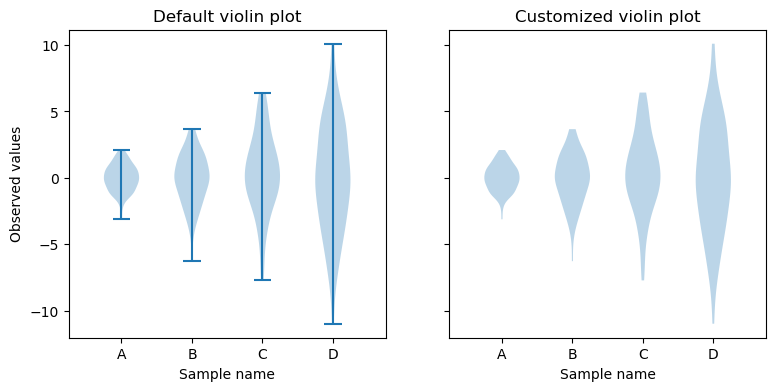

In [49]:
import matplotlib.pyplot as plt
import numpy as np


def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value


def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

df = pd.DataFrame(data)

display(df)

ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
ax1.violinplot(data)

ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
    data, showmeans=False, showmedians=False,
    showextrema=False)

labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)